**STANDARDIZATION**

**Variance is square of Std**

![Screenshot 2024-04-08 152233.png](<attachment:Screenshot 2024-04-08 152233.png>)
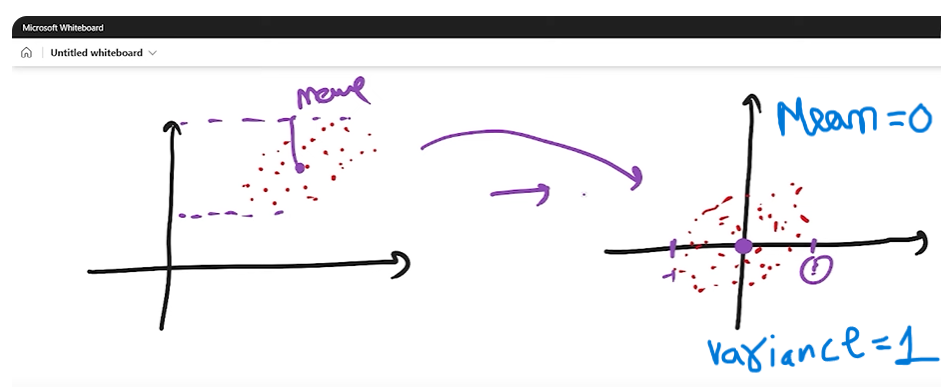

**Feature scaling have no impact on outliers ,,it just change their magnitude**

In [45]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
dataset=pd.read_csv(r"loan_data_set.csv")

In [47]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [49]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Fill missing values**

In [50]:
for i in dataset.select_dtypes(include="object").columns:
    dataset[i].fillna(dataset[i].mode()[0],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8180\2262683910.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0],inplace=True)


In [51]:
for i in dataset.select_dtypes(include="int64").columns:
    dataset[i].fillna(dataset[i].mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8180\2663005831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mean(),inplace=True)


In [52]:
for i in dataset.select_dtypes(include="float64").columns:
    dataset[i].fillna(dataset[i].mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8180\3974513424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mean(),inplace=True)


In [53]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [55]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


**As we can see their is alot of difference in range of ApplicantIncome,CoapplicantIncome,loanAmount so we will do feature scaling all these columns so that all come in eqal range so that machine learning model can understand it,,and also prevent imbalance in data due to different ranges**

/*Use sklearn library for standard scaling*/

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
ss=StandardScaler()

In [58]:
ss.fit(dataset[["ApplicantIncome"]])

StandardScaler()

In [59]:
ss.transform(dataset[["ApplicantIncome"]])

array([[ 7.29908229e-02],
       [-1.34411954e-01],
       [-3.93747337e-01],
       [-4.62062470e-01],
       [ 9.77284368e-02],
       [ 2.21831139e-03],
       [-5.03018784e-01],
       [-3.87849628e-01],
       [-2.28939128e-01],
       [ 1.21845703e+00],
       [-3.60982286e-01],
       [-4.75659966e-01],
       [-3.81788093e-01],
       [-5.81654908e-01],
       [-6.72414101e-01],
       [-7.42880841e-02],
       [-2.96107483e-01],
       [-3.10196456e-01],
       [-8.46090753e-02],
       [-4.59277440e-01],
       [ 3.69678365e-01],
       [ 9.03563002e-02],
       [-4.59277440e-01],
       [-3.33951118e-01],
       [-2.76284627e-01],
       [ 6.80946355e-01],
       [-4.26676214e-01],
       [-1.92897571e-01],
       [-6.48987089e-01],
       [-2.70878394e-01],
       [-2.02727086e-01],
       [-3.66388519e-01],
       [-1.16555001e-01],
       [-3.11834708e-01],
       [ 1.16259261e+00],
       [-5.12520649e-01],
       [-5.85750540e-01],
       [-2.84475890e-01],
       [-2.0

**Add new column in dataset to see scaled values of applicantincome**

In [60]:
dataset["ApplicantIncome_scaled"]=pd.DataFrame(ss.transform(dataset[["ApplicantIncome"]]))

In [61]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_scaled
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,-0.410130
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,-0.212557
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,0.437174
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,0.357064


**ere mean is _4.339634e-18 which means 10^-18 which is almost 0 so our mean is zero,,and std is 1 var=std^2 so var is also 1**

In [62]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_scaled
count,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,1.000815e+00
min,150.000000,0.000000,9.000000,12.000000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.238462e+01


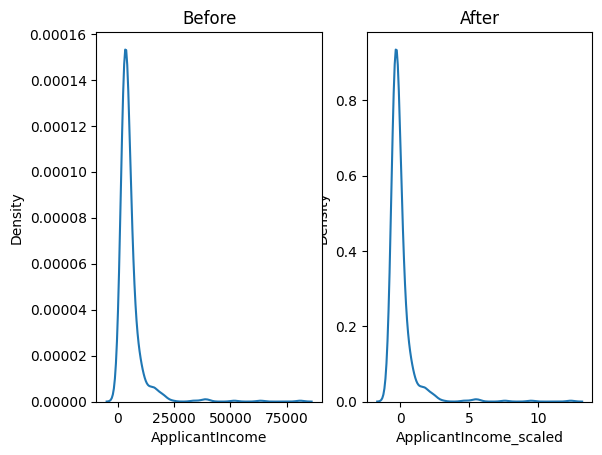

In [67]:
plt.subplot(1,2,2)
plt.title("After")
sns.kdeplot(dataset["ApplicantIncome_scaled"])
plt.subplot(1,2,1)# 1=row 2=col 1=position
plt.title("Before")
sns.kdeplot(dataset["ApplicantIncome"])
plt.show()

In [69]:
ss.fit(dataset[['CoapplicantIncome']])

StandardScaler()

In [70]:
ss.transform(dataset[['CoapplicantIncome']])

array([[-5.54487330e-01],
       [-3.87315485e-02],
       [-5.54487330e-01],
       [ 2.51979602e-01],
       [-5.54487330e-01],
       [ 8.80599712e-01],
       [-3.59954435e-02],
       [ 3.01913517e-01],
       [-3.25753123e-02],
       [ 3.19671255e+00],
       [-3.15078148e-01],
       [ 7.48168067e-02],
       [ 2.21787100e+00],
       [ 4.16829924e-01],
       [-1.83061084e-01],
       [-5.54487330e-01],
       [-5.54487330e-01],
       [-5.54487330e-01],
       [-5.54487330e-01],
       [ 6.42558582e-01],
       [-5.54487330e-01],
       [ 1.36933646e+00],
       [ 9.90997380e-02],
       [ 1.01151817e-01],
       [ 4.45901040e-01],
       [-5.54487330e-01],
       [ 2.16068224e-01],
       [-1.98793688e-01],
       [-5.54487330e-01],
       [ 1.57925994e-01],
       [ 5.97754864e-01],
       [-5.54487330e-01],
       [-5.54487330e-01],
       [ 1.56485373e-02],
       [ 4.71552023e-01],
       [ 1.52453784e-01],
       [-9.96098834e-02],
       [-5.54901912e-02],
       [ 1.9

In [72]:
dataset["CoapplicantIncome_scaled"]=pd.DataFrame(ss.transform(dataset[["CoapplicantIncome"]]))

In [73]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_scaled,CoapplicantIncome_scaled
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.072991,-0.554487
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,-0.134412,-0.038732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,-0.393747,-0.554487
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,-0.462062,0.251980
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.097728,-0.554487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,-0.410130,-0.554487
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,-0.212557,-0.554487
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,0.437174,-0.472404
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,0.357064,-0.554487


In [74]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_scaled,CoapplicantIncome_scaled
count,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,-4.339634e-18,4.050325e-17
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,1.000815e+00,1.000815e+00
min,150.000000,0.000000,9.000000,12.000000,0.000000,-8.606493e-01,-5.544873e-01
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,-4.138159e-01,-5.544873e-01
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,-2.606393e-01,-1.480047e-01
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,6.414426e-02,2.312023e-01
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.238462e+01,1.369617e+01


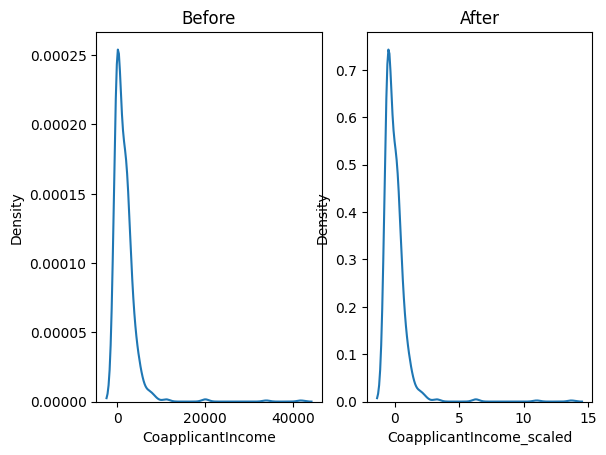

In [76]:
plt.subplot(1,2,1)
plt.title("Before")
sns.kdeplot(dataset["CoapplicantIncome"])
plt.subplot(1,2,2)
plt.title("After")
sns.kdeplot(dataset["CoapplicantIncome_scaled"])
plt.show()